# BA Thesis - Fairness in Machine Learning
---

This `Jupyter`-notebook is here to implement the necessary tasks to fulfill the analysis and so on for this thesis.

#### packages
The following packages are used in this project

In [1]:
# ! pip install -U numpy
# ! pip install -U pandas
# ! pip install -U scikit-learn
# ! pip install -U matplotlib

  Using cached numpy-1.26.2-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 19.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 10.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.1
    Uninstalling scikit-learn-1

#### imports

In [2]:
import numpy as np 
import pandas as pd
from datagen import DataGen, DataGenBuilder

#### Data generation

In [7]:
from datagen import DataGen, DataGenBuilder

builder: DataGenBuilder = (
    DataGenBuilder()
    .set_schema(
        {
            "feature1": {"type": "ratio", "distribution": "normal", "range": (1, 100)},
            "feature2": {
                "type": "nominal",
                "distribution": "normal",
                "values": [1, 2, 3],
            },
            "feature3": {
                "type": "text",
                "distribution": "normal",
                "length_range": (5, 25),
            },
            "feature4": {"type": "ratio", "distribution": "normal", "range": (1, 50)},
        }
    )
    .set_config("test")
    .set_noise(True)
    .set_classification(lambda x: x[0] > 0)
)

dataGen: DataGen = builder.build()
df = dataGen.generate_data(10_000)
# 5 random rows
df.sample(5)

/var/folders/5s/7wthnl510p9_gg2ytrfvxy180000gn/T/ipykernel_15413/3109754306.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .set_classification(lambda x: x[0] > 0)


,feature1,feature2,feature3,feature4,target
5525,28.305316,3,"'2eawg\3,d?F2xqINM'p",-72.144429,True
5453,-61.912295,3,>gK9QS$A_W??(A/+msq/,-34.560622,False
2315,41.644604,3,"""!%?zv5x,.l/{(,Kf^1(",14.489224,True
4246,-59.982202,2,"{,Uo*x""*tMNbbi'@K]=a",18.376452,False
4858,-30.098031,2,*vwz(1F$*\\9!Dv`m^i6,95.233994,False


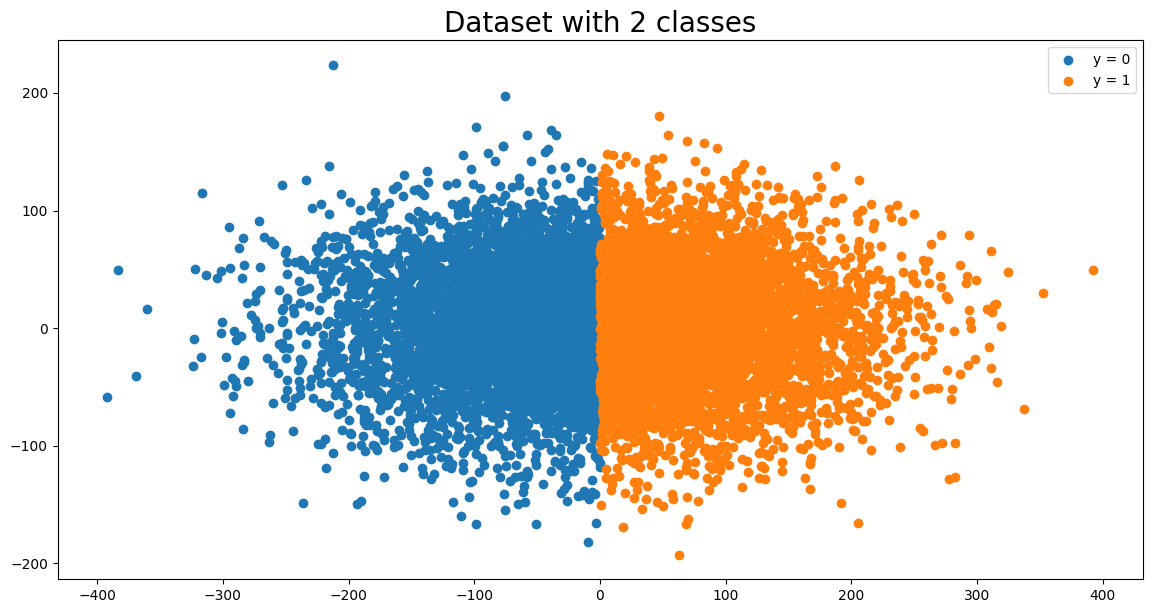

In [8]:
from matplotlib import pyplot as plt


def plot(df: pd.DataFrame, x1: str, x2: str, y: str, title: str = '', save: bool = False, figname='figure.png'):
    plt.figure(figsize=(14, 7))
    plt.scatter(x=df[df[y] == 0][x1], y=df[df[y] == 0][x2], label='y = 0')
    plt.scatter(x=df[df[y] == 1][x1], y=df[df[y] == 1][x2], label='y = 1')
    plt.title(title, fontsize=20)
    plt.legend()
    if save:
        plt.savefig(figname, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()
    

plot(df=df, x1='feature1', x2='feature4', y='target', title='Dataset with 2 classes')

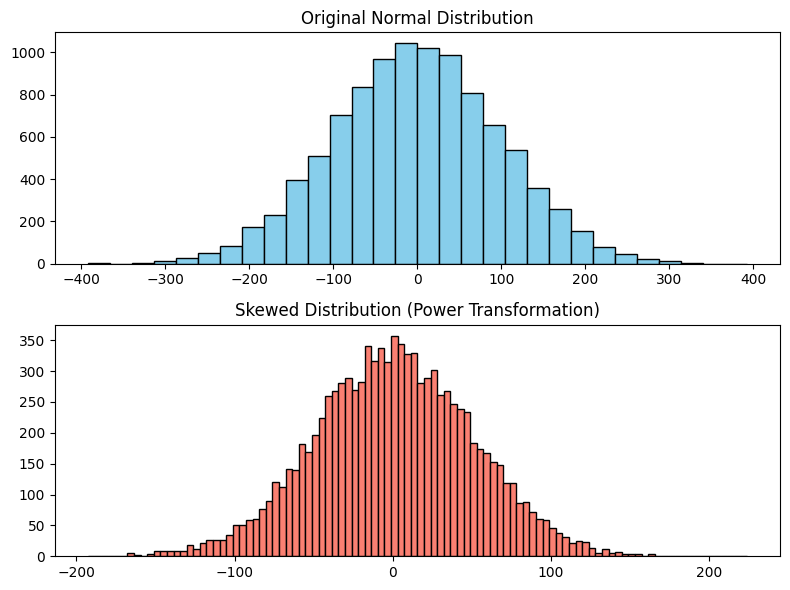

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting histograms to visualize distributions
plt.figure(figsize=(8, 6))

plt.subplot(211)
plt.hist(df['feature1'], bins=30, color='skyblue', edgecolor='black')
plt.title('Original Normal Distribution')

plt.subplot(212)
plt.hist(df['feature4'], bins=100, color='salmon', edgecolor='black')
plt.title('Skewed Distribution (Power Transformation)')

plt.tight_layout()
plt.show()

In [15]:
random_state = 12014500

In [18]:
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df)
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=random_state)

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(hidden_layer_sizes=(20, 50),
                    verbose=1,
                    random_state=random_state)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

Iteration 1, loss = 0.25006020
Iteration 2, loss = 0.05664673
Iteration 3, loss = 0.03230034
Iteration 4, loss = 0.02255784
Iteration 5, loss = 0.01849752
Iteration 6, loss = 0.01346800
Iteration 7, loss = 0.01013496
Iteration 8, loss = 0.00825435
Iteration 9, loss = 0.00657026
Iteration 10, loss = 0.00548125
Iteration 11, loss = 0.00509301
Iteration 12, loss = 0.00370935
Iteration 13, loss = 0.00371327
Iteration 14, loss = 0.00317618
Iteration 15, loss = 0.00244054
Iteration 16, loss = 0.00193669
Iteration 17, loss = 0.00157620
Iteration 18, loss = 0.00145138
Iteration 19, loss = 0.00132616
Iteration 20, loss = 0.00104453
Iteration 21, loss = 0.00091585
Iteration 22, loss = 0.00086846
Iteration 23, loss = 0.00091084
Iteration 24, loss = 0.00094732
Iteration 25, loss = 0.00073006
Iteration 26, loss = 0.00052764
Iteration 27, loss = 0.00046495
Iteration 28, loss = 0.00042917
Iteration 29, loss = 0.00038695
Iteration 30, loss = 0.00036112
Iteration 31, loss = 0.00032684
Iteration 32, los